In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MultiLabelBinarizer
from shutil import copyfile
from os import getcwd

In [2]:
f"{getcwd()}/Dataset Medicinal"

'C:\\Users\\ASUS\\Documents\\Lectures\\BANGKIT\\BANGJEK/Dataset Medicinal'

In [3]:
path_medicinal_leaf_data = f"{getcwd()}/Dataset Medicinal/dataset_medicinal_leaf.zip"

local_zip = path_medicinal_leaf_data
zip_ref = zipfile.ZipFile(local_zip, 'r')
shutil.rmtree('/tmp')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/Segmented Medicinal Leaf Images')

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [5]:
for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    print(x, len(os.listdir('/tmp/Segmented Medicinal Leaf Images/'+ x)))

Alpinia Galanga (Rasna) 50
Amaranthus Viridis (Arive-Dantu) 122
Artocarpus Heterophyllus (Jackfruit) 56
Azadirachta Indica (Neem) 60
Basella Alba (Basale) 103
Brassica Juncea (Indian Mustard) 34
Carissa Carandas (Karanda) 74
Citrus Limon (Lemon) 57
Ficus Auriculata (Roxburgh fig) 50
Ficus Religiosa (Peepal Tree) 63
Hibiscus Rosa-sinensis 43
Jasminum (Jasmine) 71
Mangifera Indica (Mango) 62
Mentha (Mint) 97
Moringa Oleifera (Drumstick) 77
Muntingia Calabura (Jamaica Cherry-Gasagase) 56
Murraya Koenigii (Curry) 60
Nerium Oleander (Oleander) 62
Nyctanthes Arbor-tristis (Parijata) 40
Ocimum Tenuiflorum (Tulsi) 52
Piper Betle (Betel) 48
Plectranthus Amboinicus (Mexican Mint) 48
Pongamia Pinnata (Indian Beech) 61
Psidium Guajava (Guava) 65
Punica Granatum (Pomegranate) 79
Santalum Album (Sandalwood) 58
Syzygium Cumini (Jamun) 39
Syzygium Jambos (Rose Apple) 56
Tabernaemontana Divaricata (Crape Jasmine) 56
Trigonella Foenum-graecum (Fenugreek) 36


In [6]:
os.mkdir('/tmp/medicinal-leaf')
os.mkdir('/tmp/medicinal-leaf/training')
os.mkdir('/tmp/medicinal-leaf/testing')
    
for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    os.mkdir('/tmp/medicinal-leaf/training/' + x)
    os.mkdir('/tmp/medicinal-leaf/testing/' + x)

In [7]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = list()
    for fname in os.listdir(SOURCE):
        f = SOURCE + fname
        if os.path.getsize(f) > 0:
            files.append(fname)

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled = random.sample(files, len(files))
    training_set = shuffled[0:training_length]
    testing_set = shuffled[:testing_length]

    for fname in training_set:
        tfile = SOURCE + fname
        destin = TRAINING + fname
        copyfile(tfile, destin)
        
    for fname in testing_set:
        tfile = SOURCE + fname
        destin = TESTING + fname
        copyfile(tfile, destin)

split_size = .9

for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    split_data('/tmp/Segmented Medicinal Leaf Images/'+ x + '/', '/tmp/medicinal-leaf/training/' + x + '/', '/tmp/medicinal-leaf/testing/' + x + '/', split_size)

In [50]:
#print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
#print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
#print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
#print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

for x in os.listdir('/tmp/Segmented Medicinal Leaf Images'):
    print('name:', x)
    print('train:', len(os.listdir('/tmp/medicinal-leaf/training/'+ x + '/')))
    print('test', len(os.listdir('/tmp/medicinal-leaf/testing/'+ x + '/')))
    print('---------------------------------------------------------')

name: Alpinia Galanga (Rasna)
train: 45
test 5
---------------------------------------------------------
name: Amaranthus Viridis (Arive-Dantu)
train: 109
test 13
---------------------------------------------------------
name: Artocarpus Heterophyllus (Jackfruit)
train: 50
test 6
---------------------------------------------------------
name: Azadirachta Indica (Neem)
train: 54
test 6
---------------------------------------------------------
name: Basella Alba (Basale)
train: 92
test 11
---------------------------------------------------------
name: Brassica Juncea (Indian Mustard)
train: 30
test 4
---------------------------------------------------------
name: Carissa Carandas (Karanda)
train: 66
test 8
---------------------------------------------------------
name: Citrus Limon (Lemon)
train: 51
test 6
---------------------------------------------------------
name: Ficus Auriculata (Roxburgh fig)
train: 45
test 5
---------------------------------------------------------
name: Ficus R

In [13]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(30, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [18]:
TRAINING_DIR = '/tmp/medicinal-leaf/training'
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    #batch_size = 10,
    target_size = (150,150),
    class_mode = 'categorical' 
)

VALIDATION_DIR = '/tmp/medicinal-leaf/testing'
validation_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    #batch_size = 10,
    target_size = (150,150),
    class_mode = 'categorical' 
)

Found 1639 images belonging to 30 classes.
Found 196 images belonging to 30 classes.


In [21]:
history = model.fit_generator(
    train_generator,
    #steps_per_epoch= 1639 // 10,
    epochs= 10,
    validation_data=validation_generator)
    #validation_steps= 196 // 10)

Epoch 1/10
52/52 [==============================] - 63s 1s/step - loss: 0.9857 - acc: 0.6943 - val_loss: 1.1138 - val_acc: 0.6684
Epoch 2/10
52/52 [==============================] - 60s 1s/step - loss: 0.9396 - acc: 0.7102 - val_loss: 0.8450 - val_acc: 0.7296
Epoch 3/10
52/52 [==============================] - 55s 1s/step - loss: 0.9173 - acc: 0.7053 - val_loss: 0.8093 - val_acc: 0.7500
Epoch 4/10
52/52 [==============================] - 55s 1s/step - loss: 0.8482 - acc: 0.7248 - val_loss: 0.6560 - val_acc: 0.7602
Epoch 5/10
52/52 [==============================] - 55s 1s/step - loss: 0.8339 - acc: 0.7328 - val_loss: 0.7548 - val_acc: 0.7602
Epoch 6/10
52/52 [==============================] - 55s 1s/step - loss: 0.7977 - acc: 0.7480 - val_loss: 0.6089 - val_acc: 0.7959
Epoch 7/10
52/52 [==============================] - 55s 1s/step - loss: 0.7768 - acc: 0.7541 - val_loss: 0.5718 - val_acc: 0.8265
Epoch 8/10
52/52 [==============================] - 56s 1s/step - loss: 0.7709 - acc: 0.74

Text(0.5, 1.0, 'Training and validation loss')

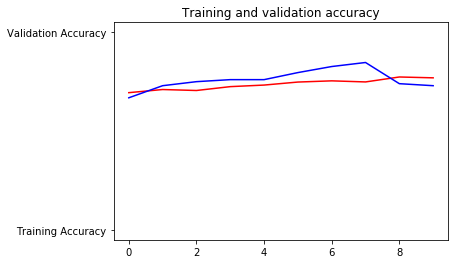

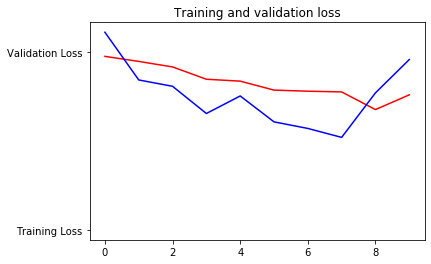

In [22]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [49]:
from keras.preprocessing import image

path = f"{getcwd()}/Dataset/Segmented Medicinal Leaf Images/Basella Alba (Basale)/BA-S-019.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes)
#for i, x in enumerate(os.listdir('/tmp/Segmented Medicinal Leaf Images')):
for i, x in enumerate(classes[0]):
    if x == 1.0:
        print(os.listdir('/tmp/Segmented Medicinal Leaf Images')[i])
        break

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
Basella Alba (Basale)


In [54]:
model.save('mymodel')